In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data['train_test']=1
test_data['traint_test']=0
all_data=pd.concat([train_data,test_data])
print(all_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'traint_test'],
      dtype='object')


DATA EXPLORATION

In [4]:
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [19]:
#separating categorical values
train_num=train_data[['Pclass','Age','SibSp','Parch','Fare']]
train_cat=train_data[['Survived','Sex','Ticket','Cabin','Embarked']]
#looking correlation between nmerical values
corr=train_num.corr()
corr.style.background_gradient(cmap='Blues')

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


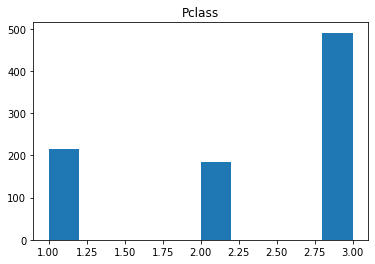

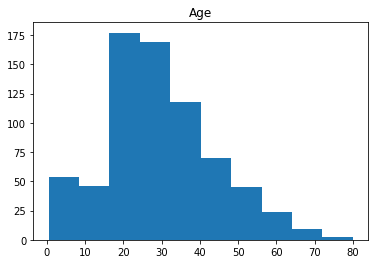

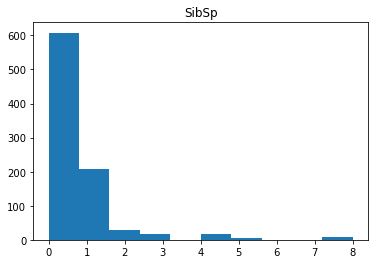

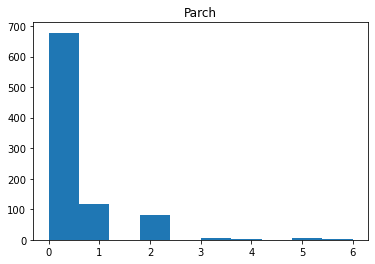

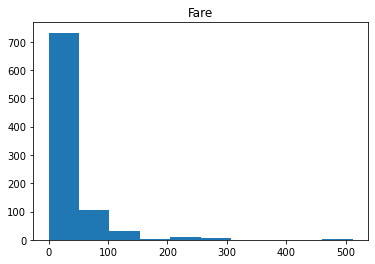

In [20]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


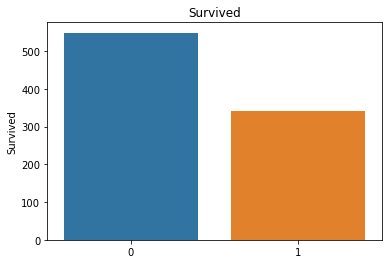

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


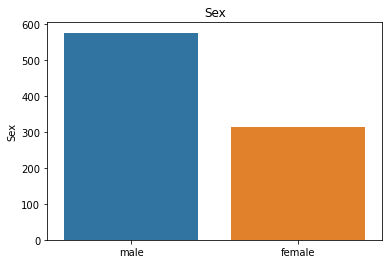

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


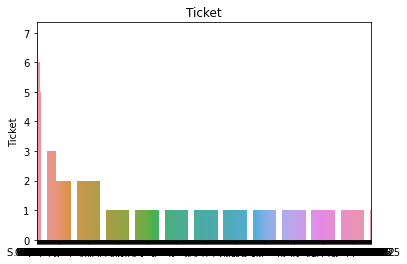

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


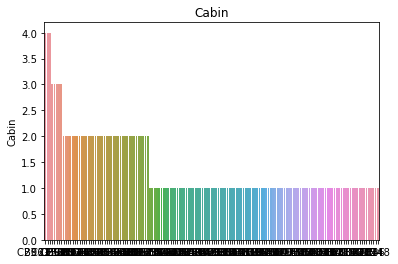

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


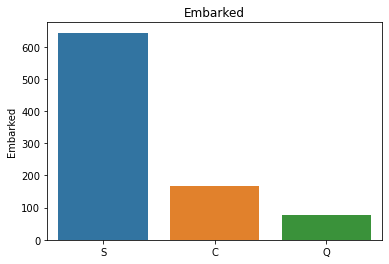

In [22]:
#Histogram to see the distribution of the categorical data
import seaborn as sns
for i in train_cat.columns:
    sns.barplot(train_cat[i].value_counts().index,train_cat[i].value_counts()).set_title(i)
    plt.show()
    

DATA PRE-PROCESSING


C:\Users\91977\AppData\Local\Temp\ipykernel_20984\3710913012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Age[np.isnan(train_data.Age)]=np.nanmean(train_data.Age,axis=0)


<AxesSubplot:>

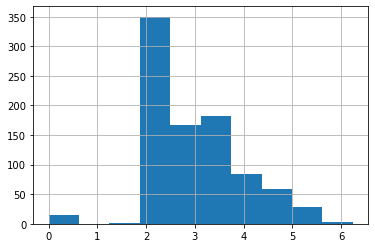

In [25]:
#input data with mean age
train_data.Age[np.isnan(train_data.Age)]=np.nanmean(train_data.Age,axis=0)
train_data['Norm_fare']=np.log(train_data['Fare']+1)
train_data['Norm_fare'].hist()

In [28]:
#selecting the relevant data
train_data.Pclass=train_data.Pclass.astype('string')
my_dummies=pd.get_dummies(train_data[['Pclass','Sex','Age','SibSp','Parch','Norm_fare','Embarked']])
#print(my_dummies.columns)
#scale between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data_scaled=my_dummies.copy()
train_data_scaled[['Age','SibSp','Parch','Norm_fare']]=scaler.fit_transform(train_data_scaled[['Age','SibSp','Parch','Norm_fare']])
train_data_scaled


,Pclass,Age,SibSp,Parch,Norm_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.592481,0.432793,-0.473674,-0.879741,0,1,0,0,1
1,1,0.638789,0.432793,-0.473674,1.361220,1,0,1,0,0
2,3,-0.284663,-0.474545,-0.473674,-0.798540,1,0,0,0,1
3,1,0.407926,0.432793,-0.473674,1.062038,1,0,0,0,1
4,3,0.407926,-0.474545,-0.473674,-0.784179,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,-0.207709,-0.474545,-0.473674,-0.333698,0,1,0,0,1
887,1,-0.823344,-0.474545,-0.473674,0.487082,1,0,0,0,1
888,3,0.000000,0.432793,2.008933,0.242007,1,0,0,0,1
889,1,-0.284663,-0.474545,-0.473674,0.487082,0,1,1,0,0


In [32]:
all_data.dropna(subset=['Embarked'],inplace=True)
all_data.Age[np.isnan(all_data.Age)]=np.nanmean(all_data.Age,axis=0)
all_data['Norm_fare']=np.log(all_data.Fare+1)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Norm_fare', 'Embarked', 'train_test']])
all_data_scaled=all_dummies.copy()
all_data_scaled[['Age', 'SibSp', 'Parch', 'Norm_fare']] = scaler.fit_transform(all_data_scaled[['Age', 'SibSp', 'Parch', 'Norm_fare']])
all_data_scaled

C:\Users\91977\AppData\Local\Temp\ipykernel_20984\893482402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.Age[np.isnan(all_data.Age)]=np.nanmean(all_data.Age,axis=0)


,Pclass,Age,SibSp,Parch,Norm_fare,train_test,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.610060,0.480272,-0.445407,-0.896199,1.0,0,1,0,0,1
1,1,0.634548,0.480272,-0.445407,1.347196,1.0,1,0,1,0,0
2,3,-0.298908,-0.479537,-0.445407,-0.814910,1.0,1,0,0,0,1
3,1,0.401184,0.480272,-0.445407,1.047689,1.0,1,0,0,0,1
4,3,0.401184,-0.479537,-0.445407,-0.800534,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0.000000,-0.479537,-0.445407,-0.800534,NaN,0,1,0,0,1
414,1,0.712336,-0.479537,-0.445407,1.780269,NaN,1,0,1,0,0
415,3,0.673442,-0.479537,-0.445407,-0.896199,NaN,0,1,0,0,1
416,3,0.000000,-0.479537,-0.445407,-0.800534,NaN,0,1,0,0,1


In [35]:
#splitting the data
X_train=all_data_scaled[all_data_scaled.train_test==1].drop(['train_test'],axis=1)
X_test=all_data_scaled[all_data_scaled.train_test==1].drop(['train_test'],axis=1)
y_train=all_data[all_data.train_test==1].Survived
print(X_train.shape)
print(X_test.shape)


(889, 10)
(889, 10)
(889,)


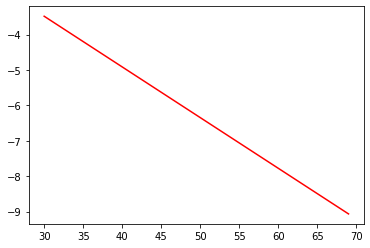

In [39]:
#importing modules
from sklearn.linear_model import LinearRegression
obj=LinearRegression()
obj.fit(X_train,y_train)
m=obj.coef_[0]
c=obj.intercept_
x_line=np.arange(30,70,1)
y_line=m*x_line+c
plt.plot(x_line,y_line,color='Red')

In [45]:
Y_pred=obj.predict(X_test)
obj.score(X_train,y_train)
acc_obj=round(obj.score(X_train,y_train)*100,2)
print(Y_pred)
print(acc_obj)

[ 0.08157401  0.93480522  0.61063717  0.88193457  0.06135442  0.1566217
  0.32367061  0.11931652  0.56875018  0.89114269  0.69712882  0.76437526
  0.14989729 -0.07896318  0.68107385  0.61480216  0.14556231  0.25675821
  0.56694791  0.63999033  0.25910411  0.23221765  0.7387689   0.45865381
  0.58075077  0.4239648   0.14313893  0.40355505  0.65031882  0.09093987
  0.43196629  1.01857209  0.64958704  0.03350555  0.50398695  0.34273761
  0.14316442  0.14399443  0.59178808  0.70146336  0.48409483  0.74105715
  0.14705305  0.92048938  0.71432112  0.09179785  0.13250603  0.64958704
  0.08998178  0.64315676  0.06843278  0.1425959   0.87350019  0.73947567
  0.29793674  0.44777723  0.79598555  0.15108957  0.83296377 -0.02458614
  0.18945815  0.34830198  0.09530234  0.491924    0.0995654   0.74876269
  0.15639404  0.40485916  0.0139556   0.23420272  0.44275097  0.39241551
  0.14541169  0.17137058  0.11812615  0.09093987  0.09179785  0.41474904
  0.60759359  0.14307505  0.10419086  0.64980054  0.